In [1]:
import analysis
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = analysis.df

In [3]:
df.head()
print(df.columns)

Index(['Unnamed: 0', 'id', 'created_at', 'in_reply_to_id',
       'in_reply_to_account_id', 'sensitive', 'spoiler_text', 'visibility',
       'language', 'uri', 'url', 'replies_count', 'reblogs_count',
       'favourites_count', 'edited_at', 'content', 'reblog', 'account',
       'media_attachments', 'mentions', 'tags', 'emojis', 'card', 'poll',
       'application', 'limited', 'local_only', 'content_type', 'quote'],
      dtype='object')


In [4]:
sensitive_df = df[df['sensitive'] == True]
sensitive_df.shape

(65, 29)

In [5]:
df.content

../data/mastodon/python_tooswales_toots_fairdata_228.csv  0      <p>Publish your data with confidence! </p><p>O...
                                                          1      <p><a href="https://mastodon.green/tags/NewSpe...
                                                          2      <p><a href="https://mastodon.green/tags/NewSpe...
                                                          3      <p>Learn about FAIR-principled stewardship of ...
                                                          4      <p>On June 26th, <span class="h-card"><a href=...
                                                                                       ...                        
../data/mastodon/python_appuk_toots_fairdata_392.csv      387    <p>My <a href="https://scholar.social/tags/int...
                                                          388    <p>Alright found a better home! Here's another...
                                                          389    <p>At the <a hr

In [6]:
# Anwenden der preprocess function auf die 'content'-Spalte
df['content'] = df['content'].apply(analysis.preprocess_text)

In [7]:
df.content

../data/mastodon/python_tooswales_toots_fairdata_228.csv  0      publish your data with confidence our data pub...
                                                          1      newspecies new jumping spider from china just ...
                                                          2      newspecies new freshwater mussel from north ca...
                                                          3      learn about fair principled stewardship of mac...
                                                          4      on june th danielvanstrien machine learning li...
                                                                                       ...                        
../data/mastodon/python_appuk_toots_fairdata_392.csv      387    my introduction i m daniel bangert national op...
                                                          388    alright found a better home here s another int...
                                                          389    at the scenario

## Wordcloud

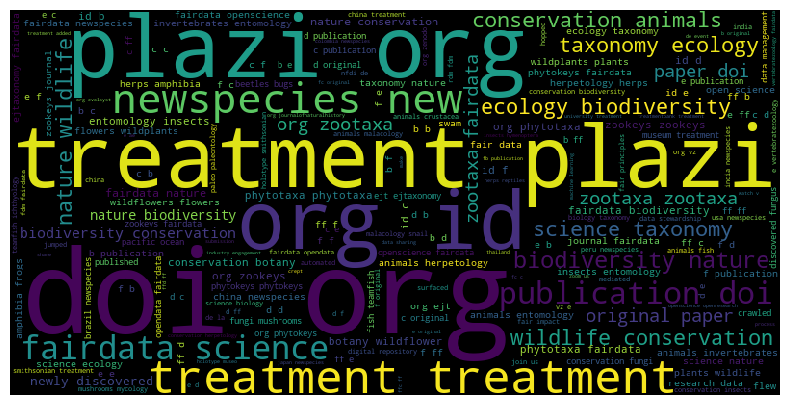

In [8]:

# Nehmen wir an, df ist Ihr DataFrame und 'content' ist die Spalte, die die Tweets enthält

# Verbinde alle Tweets zu einem großen Text
text = ' '.join(df['content'])

# Erstelle die Wortwolke
wordcloud = WordCloud(width=800, height=400).generate(text)

# Zeige die Wortwolke an
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='nearest', cmap='Blues')
plt.axis('off')
plt.show()

## Polarity Score

In [9]:
import pandas as pd
from textblob import TextBlob

# Angenommen, Ihr DataFrame heißt df und die Spalte, die Sie analysieren möchten, heißt 'content'
df['polarity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(df['polarity'])

../data/mastodon/python_tooswales_toots_fairdata_228.csv  0      0.600000
                                                          1      0.136364
                                                          2      0.136364
                                                          3      0.700000
                                                          4      0.544444
                                                                   ...   
../data/mastodon/python_appuk_toots_fairdata_392.csv      387    0.000000
                                                          388    0.178636
                                                          389    0.250000
                                                          390   -0.061111
                                                          391    0.164286
Name: polarity, Length: 7590, dtype: float64


In [10]:
polarity_counts = df['polarity'].value_counts().sort_index()
print(polarity_counts)

-0.131818    20
-0.079365    21
-0.061111    19
-0.054545    19
-0.041667    18
             ..
 0.700000    95
 0.725000     1
 0.750000    23
 0.800000    10
 1.000000    24
Name: polarity, Length: 158, dtype: int64


In [11]:
bins = pd.cut(df['polarity'], bins=30)
polarity_counts = bins.value_counts().sort_index()
print(polarity_counts)

(-0.133, -0.0941]       20
(-0.0941, -0.0564]      40
(-0.0564, -0.0186]      37
(-0.0186, 0.0191]      943
(0.0191, 0.0568]       159
(0.0568, 0.0945]       321
(0.0945, 0.132]        326
(0.132, 0.17]         2288
(0.17, 0.208]          288
(0.208, 0.245]         185
(0.245, 0.283]        1400
(0.283, 0.321]         169
(0.321, 0.359]         170
(0.359, 0.396]         187
(0.396, 0.434]         157
(0.434, 0.472]         171
(0.472, 0.51]          229
(0.51, 0.547]          105
(0.547, 0.585]         126
(0.585, 0.623]          49
(0.623, 0.66]           40
(0.66, 0.698]            0
(0.698, 0.736]         123
(0.736, 0.774]          23
(0.774, 0.811]          10
(0.811, 0.849]           0
(0.849, 0.887]           0
(0.887, 0.925]           0
(0.925, 0.962]           0
(0.962, 1.0]            24
Name: polarity, dtype: int64


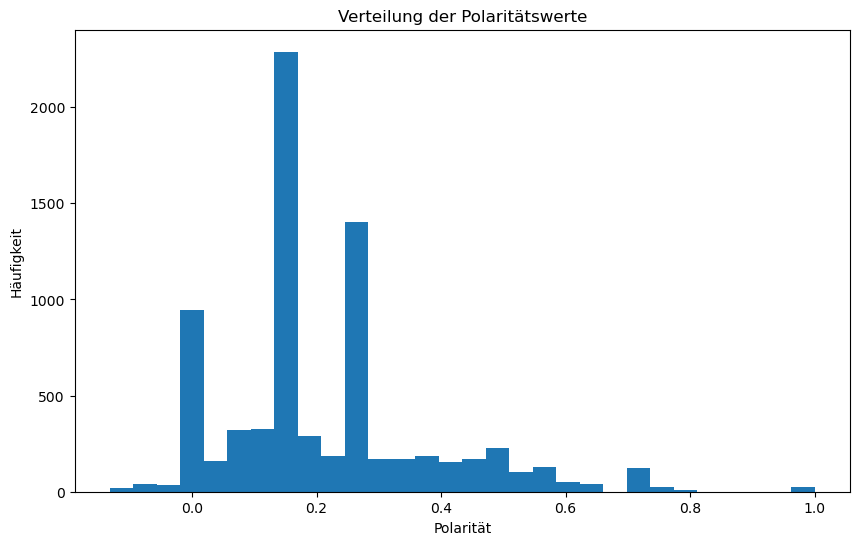

In [12]:
plt.figure(figsize=(10,6))
plt.hist(df['polarity'], bins=30)
plt.title('Verteilung der Polaritätswerte')
plt.xlabel('Polarität')
plt.ylabel('Häufigkeit')
plt.savefig('../results/verteilung_poralitaet')
plt.show()

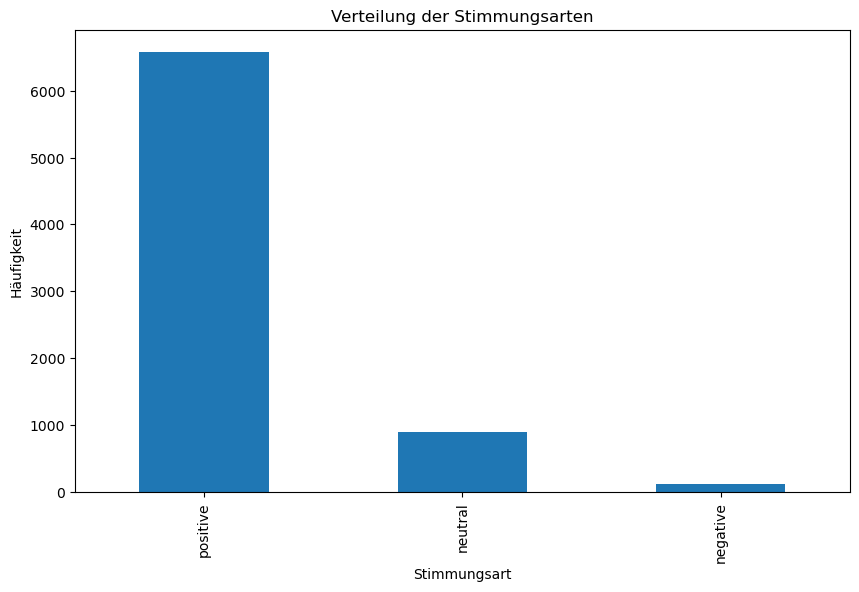

In [13]:
df['sentiment_type'] = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in df['polarity']]

plt.figure(figsize=(10,6))
df['sentiment_type'].value_counts().plot(kind='bar')
plt.title('Verteilung der Stimmungsarten')
plt.xlabel('Stimmungsart')
plt.ylabel('Häufigkeit')
plt.savefig('../results/verteilung_stimmungsarten')
plt.show()

In [14]:
from collections import Counter

# Erstellen Sie eine Liste aller Wörter in den Tweets
words = [word for tweet in df['content'] for word in tweet.split()]

# Zählen Sie die Häufigkeit jedes Wortes
word_counts = Counter(words)

# Drucken Sie die 10 häufigsten Wörter
print(word_counts.most_common(10))

[('org', 9023), ('treatment', 8294), ('fairdata', 7672), ('a', 6212), ('the', 5833), ('from', 4631), ('doi', 4359), ('in', 4313), ('plazi', 4256), ('id', 4184)]


In [15]:
df['tweet_length'] = df['content'].apply(len)


In [16]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))


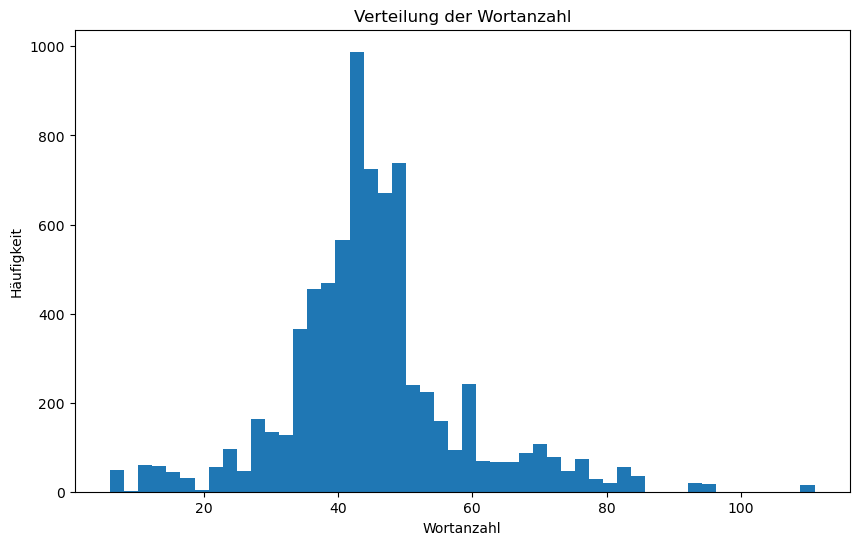

In [17]:
plt.figure(figsize=(10,6))
plt.hist(df['word_count'], bins=50)
plt.title('Verteilung der Wortanzahl')
plt.xlabel('Wortanzahl')
plt.ylabel('Häufigkeit')
plt.savefig('../results/verteilung_wordcount')
plt.show()

In [18]:
bins = pd.cut(df['word_count'], bins=50)
polarity_counts = bins.value_counts().sort_index()
print(polarity_counts)

(5.895, 8.1]       48
(8.1, 10.2]         1
(10.2, 12.3]       61
(12.3, 14.4]       57
(14.4, 16.5]       44
(16.5, 18.6]       30
(18.6, 20.7]        3
(20.7, 22.8]       56
(22.8, 24.9]       97
(24.9, 27.0]       70
(27.0, 29.1]      140
(29.1, 31.2]      134
(31.2, 33.3]      127
(33.3, 35.4]      366
(35.4, 37.5]      456
(37.5, 39.6]      469
(39.6, 41.7]      566
(41.7, 43.8]      988
(43.8, 45.9]      724
(45.9, 48.0]      980
(48.0, 50.1]      428
(50.1, 52.2]      240
(52.2, 54.3]      225
(54.3, 56.4]      159
(56.4, 58.5]       93
(58.5, 60.6]      243
(60.6, 62.7]       68
(62.7, 64.8]       67
(64.8, 66.9]       67
(66.9, 69.0]      152
(69.0, 71.1]       43
(71.1, 73.2]       77
(73.2, 75.3]       47
(75.3, 77.4]       74
(77.4, 79.5]       28
(79.5, 81.6]       19
(81.6, 83.7]       55
(83.7, 85.8]       36
(85.8, 87.9]        0
(87.9, 90.0]        0
(90.0, 92.1]        0
(92.1, 94.2]       19
(94.2, 96.3]       17
(96.3, 98.4]        0
(98.4, 100.5]       0
(100.5, 10

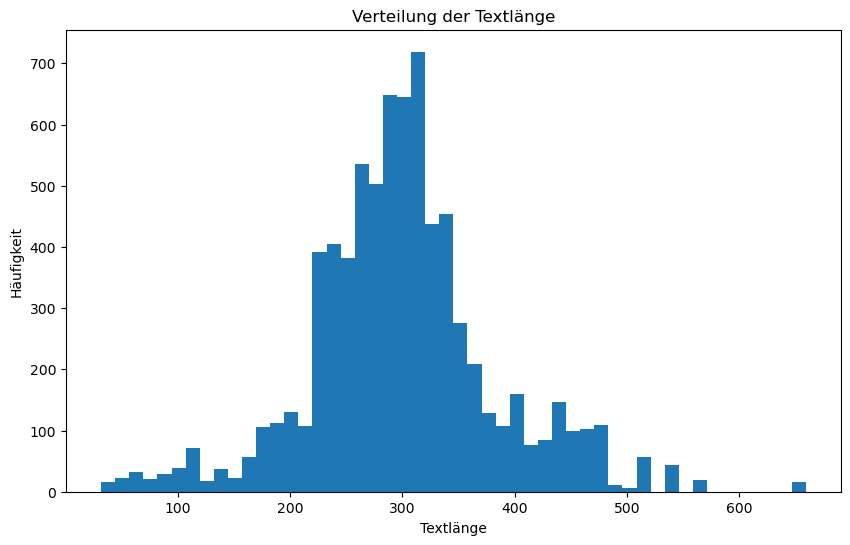

In [19]:
plt.figure(figsize=(10,6))
plt.hist(df['tweet_length'], bins=50)
plt.title('Verteilung der Textlänge')
plt.xlabel('Textlänge')
plt.ylabel('Häufigkeit')
plt.savefig('../results/verteilung_textlaenge')

plt.show()

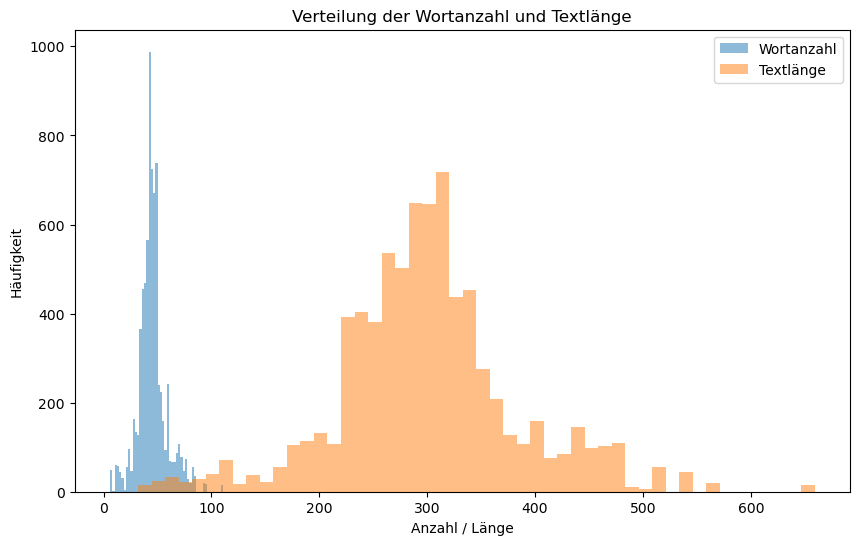

In [20]:
plt.figure(figsize=(10,6))

plt.hist(df['word_count'], bins=50, alpha=0.5, label='Wortanzahl')

plt.hist(df['tweet_length'], bins=50, alpha=0.5, label='Textlänge')

plt.title('Verteilung der Wortanzahl und Textlänge')
plt.xlabel('Anzahl / Länge')
plt.ylabel('Häufigkeit')
plt.legend()

plt.savefig('../results/verteilung_combined')
plt.show()

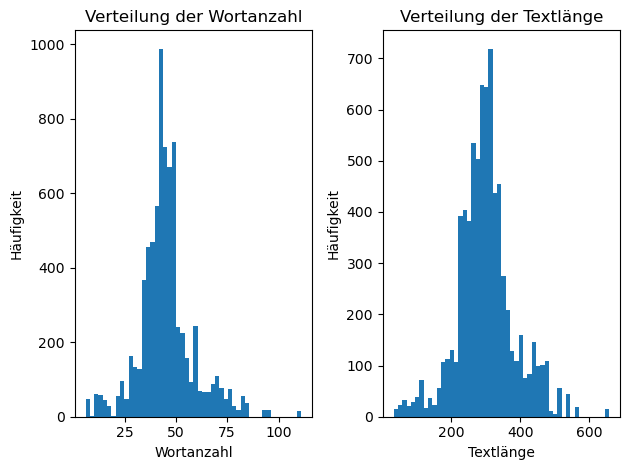

In [21]:
plt.subplot(1, 2, 1)  
plt.hist(df['word_count'], bins=50)
plt.title('Verteilung der Wortanzahl')
plt.xlabel('Wortanzahl')
plt.ylabel('Häufigkeit')

plt.subplot(1, 2, 2)  
plt.hist(df['tweet_length'], bins=50)
plt.title('Verteilung der Textlänge')
plt.xlabel('Textlänge')
plt.ylabel('Häufigkeit')

plt.tight_layout()  
plt.savefig('../results/verteilung_combined_2.png')
plt.show() 

In [22]:
bins = pd.cut(df['tweet_length'], bins=50)
polarity_counts = bins.value_counts().sort_index()
print(polarity_counts)

(31.373, 44.54]      16
(44.54, 57.08]       23
(57.08, 69.62]       33
(69.62, 82.16]       21
(82.16, 94.7]        29
(94.7, 107.24]       39
(107.24, 119.78]     72
(119.78, 132.32]     18
(132.32, 144.86]     37
(144.86, 157.4]      22
(157.4, 169.94]      56
(169.94, 182.48]    106
(182.48, 195.02]    113
(195.02, 207.56]    131
(207.56, 220.1]     107
(220.1, 232.64]     392
(232.64, 245.18]    404
(245.18, 257.72]    382
(257.72, 270.26]    535
(270.26, 282.8]     503
(282.8, 295.34]     648
(295.34, 307.88]    645
(307.88, 320.42]    719
(320.42, 332.96]    438
(332.96, 345.5]     454
(345.5, 358.04]     275
(358.04, 370.58]    209
(370.58, 383.12]    128
(383.12, 395.66]    108
(395.66, 408.2]     159
(408.2, 420.74]      76
(420.74, 433.28]     84
(433.28, 445.82]    146
(445.82, 458.36]     99
(458.36, 470.9]     102
(470.9, 483.44]     109
(483.44, 495.98]     11
(495.98, 508.52]      6
(508.52, 521.06]     56
(521.06, 533.6]       0
(533.6, 546.14]      44
(546.14, 558.68]

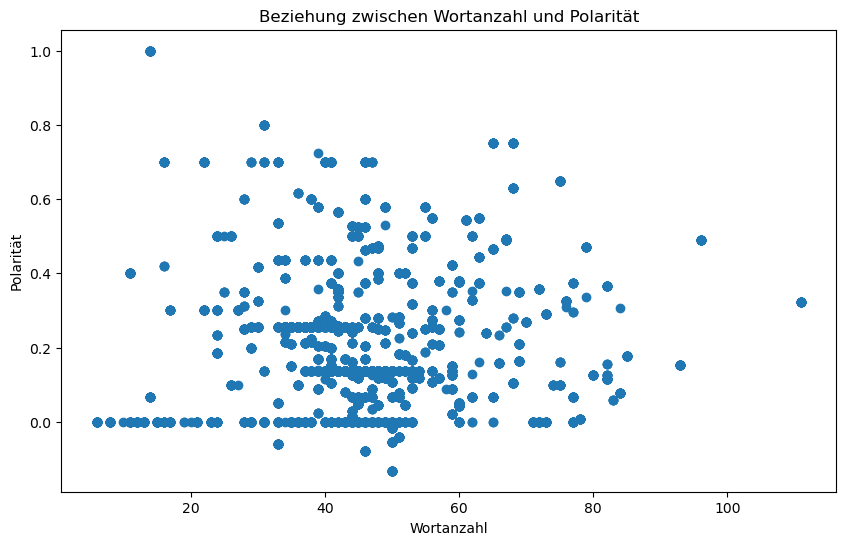

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(df['word_count'], df['polarity'])
plt.title('Beziehung zwischen Wortanzahl und Polarität')
plt.xlabel('Wortanzahl')
plt.ylabel('Polarität')
plt.savefig('../results/beziehung_wortanzahl_polarität')
plt.show()

In [24]:
## Prepare data for archive

In [26]:
df = df[df['sensitive'] != True]
df.shape

(7525, 33)